In [1]:
# Cell 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# make pandas display all columns
pd.set_option('display.max_columns', None)



In [2]:
# Cell 2: Load Data
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Churn'>

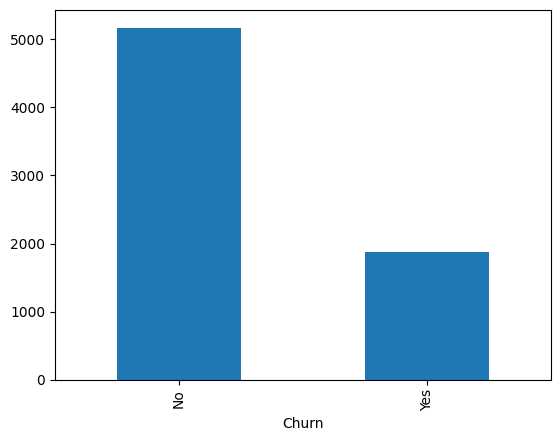

In [3]:
# Perform Exploration to understand data better.
# df.info()
# df.describe()
df['Churn'].value_counts().plot(kind='bar')




Overall Churn Rate: 26.54%


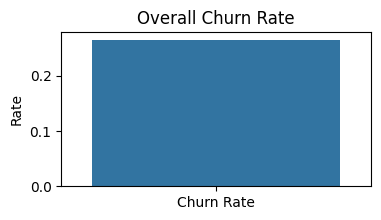

Churn Rate by Contract Type:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


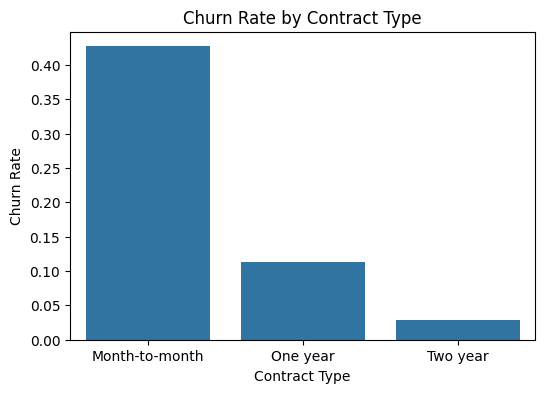

Churn Rate by Tenure Group:
tenure_group
0-12     0.476782
13-24    0.287109
25-48    0.203890
49-72    0.095132
Name: Churn, dtype: float64


/tmp/ipykernel_20190/4170168716.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].mean()


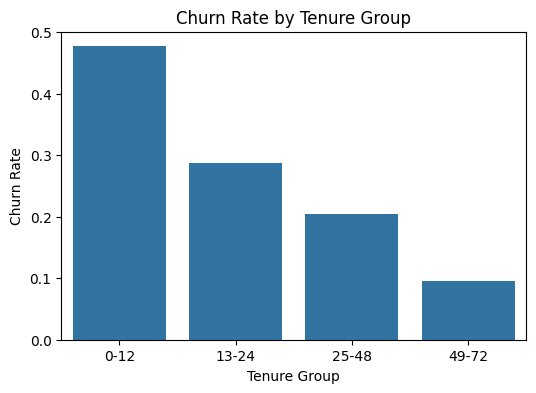

Churn Rate by Monthly Charges Group:
MonthlyCharges_group
Low          0.108934
Medium       0.239420
High         0.378140
Very High    0.208494
Name: Churn, dtype: float64


/tmp/ipykernel_20190/4170168716.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_churn = df.groupby('MonthlyCharges_group')['Churn'].mean()


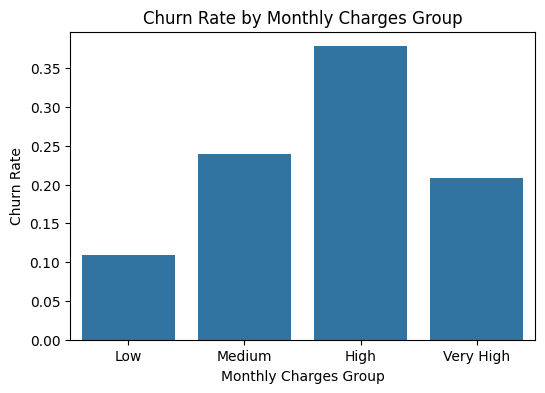

In [4]:
# Churn rate
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

churn_rate = df['Churn'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")
plt.figure(figsize=(4,2))
sns.barplot(x=['Churn Rate'], y=[churn_rate])
plt.ylabel('Rate')
plt.title('Overall Churn Rate')
plt.show()

# Churn by contract type
contract_churn = df.groupby('Contract')['Churn'].mean()
print("Churn Rate by Contract Type:")
print(contract_churn)
plt.figure(figsize=(6,4))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

# Churn by tenure (binned)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])
tenure_churn = df.groupby('tenure_group')['Churn'].mean()
print("Churn Rate by Tenure Group:")
print(tenure_churn)
plt.figure(figsize=(6,4))
sns.barplot(x=tenure_churn.index, y=tenure_churn.values)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Group')
plt.show()

# Churn by MonthlyCharges (binned)
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 105, df['MonthlyCharges'].max()], labels=['Low', 'Medium', 'High', 'Very High'])
charges_churn = df.groupby('MonthlyCharges_group')['Churn'].mean()
print("Churn Rate by Monthly Charges Group:")
print(charges_churn)
plt.figure(figsize=(6,4))
sns.barplot(x=charges_churn.index, y=charges_churn.values)
plt.xlabel('Monthly Charges Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Monthly Charges Group')
plt.show()

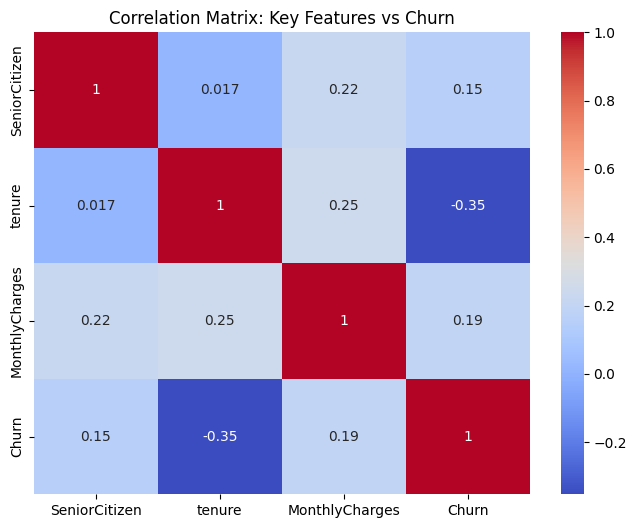

Insight: Tenure is negatively correlated with churn (-0.35), indicating longer-tenured customers are less likely to churn. Monthly charges and being a senior citizen are positively correlated with churn.


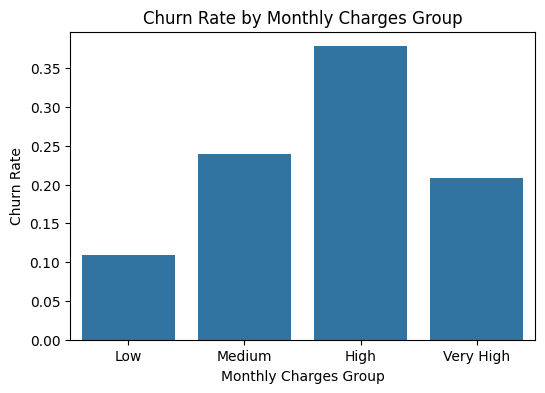

Insight: Customers with higher monthly charges ('High') have a significantly higher churn rate (37.8%) compared to those with 'Low' charges (10.9%).


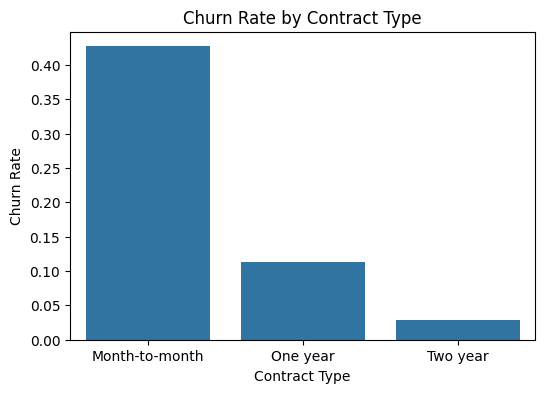

Insight: Month-to-month contracts have the highest churn rate (42.7%), while two-year contracts have the lowest (2.8%). Longer contracts reduce churn.


/tmp/ipykernel_20190/3703990265.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_charge_churn = df.groupby(['Contract', 'MonthlyCharges_group'])['Churn'].mean().unstack()


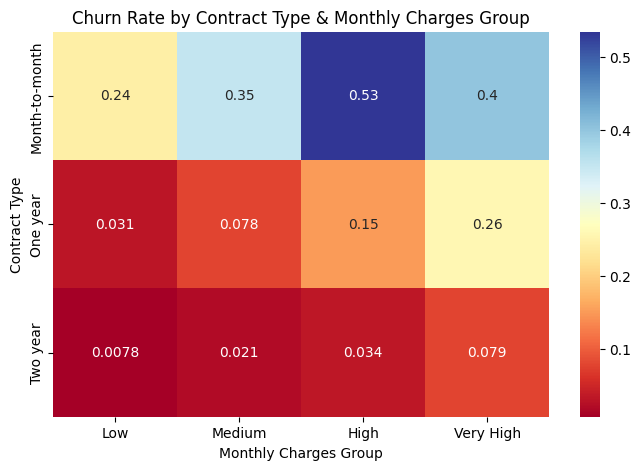

Insight: Month-to-month customers with high charges are most likely to churn (>53%). Targeting these customers for retention could be impactful.


/tmp/ipykernel_20190/3703990265.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_bin_churn = df.groupby('tenure_bin')['Churn'].mean()


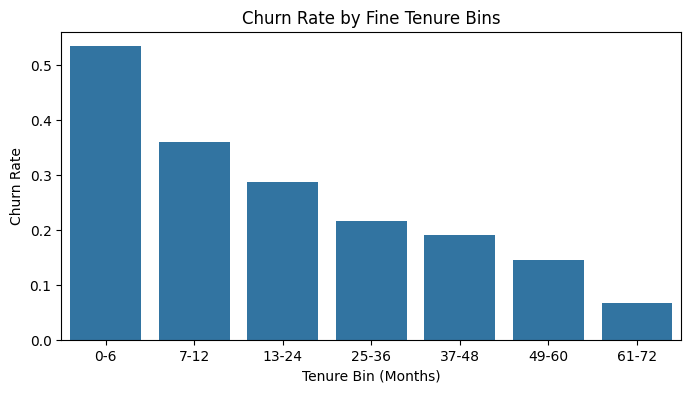

Insight: Churn is highest in the first 6 months (53%) and drops steadily as tenure increases. Early engagement is critical.


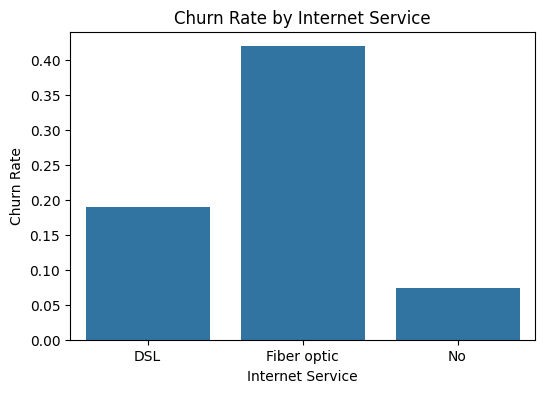

Insight: Fiber optic customers have the highest churn (41.9%), suggesting possible dissatisfaction or competition.


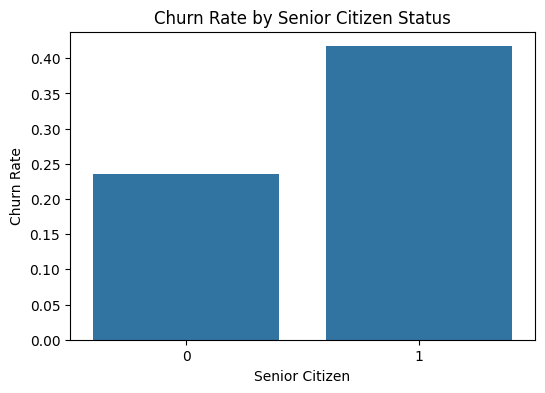

Insight: Senior citizens churn at a much higher rate (41.7%) than non-seniors (23.6%).


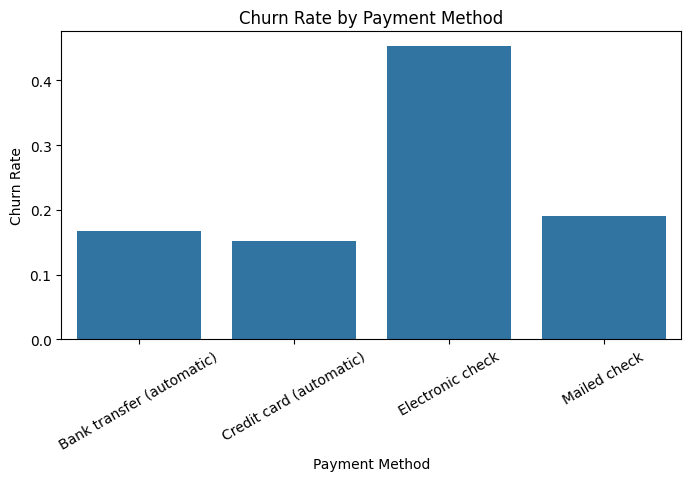

Insight: Electronic check users have the highest churn (45.3%). Automatic payment methods are associated with lower churn.

Recommendations:
1. Focus retention efforts on month-to-month customers, especially those with high monthly charges and short tenure.
2. Develop onboarding and engagement programs for new customers to reduce early churn.
3. Investigate reasons for high churn among fiber optic and senior citizen segments; consider tailored offers or support.
4. Encourage automatic payment methods to reduce churn.
5. Use targeted campaigns for high-risk groups identified above.



In [5]:
# In-depth Analysis of Factors Affecting Customer Churn in Telecom

# 1. Correlation Analysis
numeric_df = df.drop('customerID', axis=1).select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Key Features vs Churn')
plt.show()

print("Insight: Tenure is negatively correlated with churn (-0.35), indicating longer-tenured customers are less likely to churn. Monthly charges and being a senior citizen are positively correlated with churn.")

# 2. Churn by Monthly Charges
plt.figure(figsize=(6,4))
sns.barplot(x=charges_churn.index, y=charges_churn.values)
plt.title('Churn Rate by Monthly Charges Group')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Churn Rate')
plt.show()

print("Insight: Customers with higher monthly charges ('High') have a significantly higher churn rate (37.8%) compared to those with 'Low' charges (10.9%).")

# 3. Churn by Contract Type
plt.figure(figsize=(6,4))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

print("Insight: Month-to-month contracts have the highest churn rate (42.7%), while two-year contracts have the lowest (2.8%). Longer contracts reduce churn.")

# 4. Combined Effect: Contract Type & Monthly Charges
contract_charge_churn = df.groupby(['Contract', 'MonthlyCharges_group'])['Churn'].mean().unstack()
plt.figure(figsize=(8,5))
sns.heatmap(contract_charge_churn, annot=True, cmap='RdYlBu')
plt.title('Churn Rate by Contract Type & Monthly Charges Group')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Contract Type')
plt.show()

print("Insight: Month-to-month customers with high charges are most likely to churn (>53%). Targeting these customers for retention could be impactful.")

# 5. Churn by Tenure (Fine Bins)
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 36, 48, 60, 72], 
						  labels=['0-6','7-12','13-24','25-36','37-48','49-60','61-72'])
tenure_bin_churn = df.groupby('tenure_bin')['Churn'].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=tenure_bin_churn.index, y=tenure_bin_churn.values)
plt.title('Churn Rate by Fine Tenure Bins')
plt.xlabel('Tenure Bin (Months)')
plt.ylabel('Churn Rate')
plt.show()

print("Insight: Churn is highest in the first 6 months (53%) and drops steadily as tenure increases. Early engagement is critical.")

# 6. Churn by Internet Service Type
internet_churn = df.groupby('InternetService')['Churn'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=internet_churn.index, y=internet_churn.values)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.show()

print("Insight: Fiber optic customers have the highest churn (41.9%), suggesting possible dissatisfaction or competition.")

# 7. Churn by Senior Citizen Status
senior_churn = df.groupby('SeniorCitizen')['Churn'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=senior_churn.index.astype(str), y=senior_churn.values)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')
plt.show()

print("Insight: Senior citizens churn at a much higher rate (41.7%) than non-seniors (23.6%).")

# 8. Churn by Payment Method
payment_churn = df.groupby('PaymentMethod')['Churn'].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=payment_churn.index, y=payment_churn.values)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=30)
plt.show()

print("Insight: Electronic check users have the highest churn (45.3%). Automatic payment methods are associated with lower churn.")

# Recommendations
print("""
Recommendations:
1. Focus retention efforts on month-to-month customers, especially those with high monthly charges and short tenure.
2. Develop onboarding and engagement programs for new customers to reduce early churn.
3. Investigate reasons for high churn among fiber optic and senior citizen segments; consider tailored offers or support.
4. Encourage automatic payment methods to reduce churn.
5. Use targeted campaigns for high-risk groups identified above.
""")

Churn Rate by Contract Type and Monthly Charges Group:
MonthlyCharges_group       Low    Medium      High  Very High
Contract                                                     
Month-to-month        0.242938  0.353271  0.534990   0.400000
One year              0.031169  0.078167  0.151943   0.258278
Two year              0.007788  0.021127  0.034156   0.078512


/tmp/ipykernel_20190/2401891700.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_charge_churn = df.groupby(['Contract', 'MonthlyCharges_group'])['Churn'].mean().unstack()


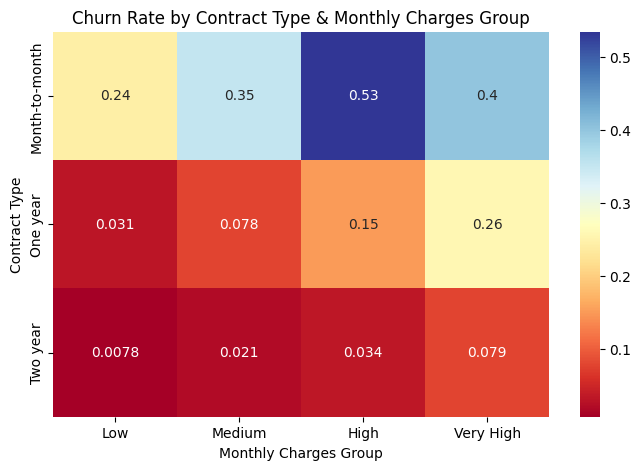

Churn Rate by Tenure Group and Internet Service:
InternetService       DSL  Fiber optic        No
tenure_group                                    
0-12             0.402685     0.698808  0.181460
13-24            0.196429     0.487751  0.037657
25-48            0.107861     0.366197  0.017804
49-72            0.043147     0.170611  0.013730


/tmp/ipykernel_20190/2401891700.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_internet_churn = df.groupby(['tenure_group', 'InternetService'])['Churn'].mean().unstack()


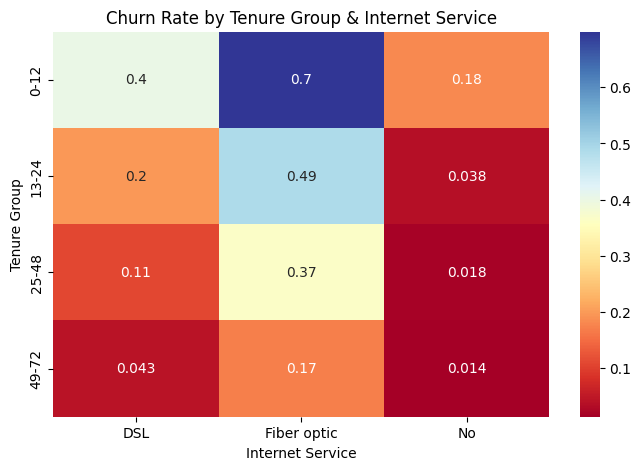

Churn Rate by Senior Citizen Status and Payment Method:
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
SeniorCitizen                                                       
0                               0.156369                 0.130669   
1                               0.227468                 0.280543   

PaymentMethod  Electronic check  Mailed check  
SeniorCitizen                                  
0                      0.425748      0.173913  
1                      0.533670      0.468085  


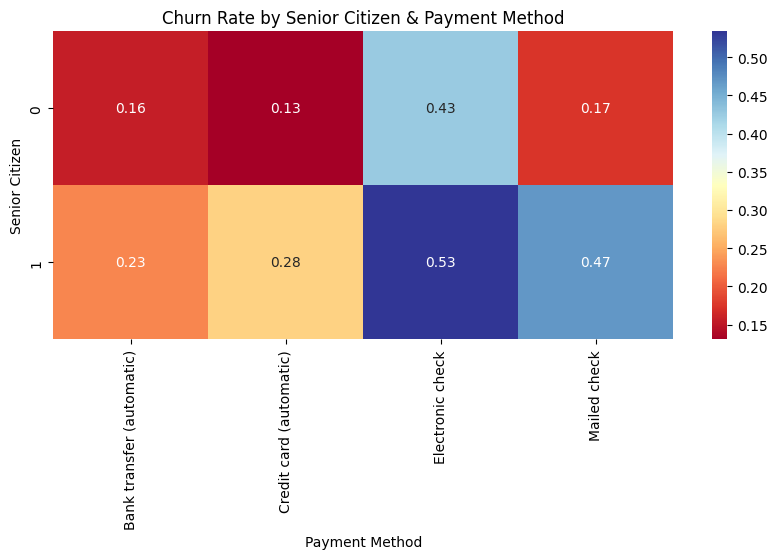

Churn Rate by Fine Tenure Bins:
tenure_bin
0-6      0.533333
7-12     0.358865
13-24    0.287109
25-36    0.216346
37-48    0.190289
49-60    0.144231
61-72    0.066098
Name: Churn, dtype: float64


/tmp/ipykernel_20190/2401891700.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_bin_churn = df.groupby('tenure_bin')['Churn'].mean()


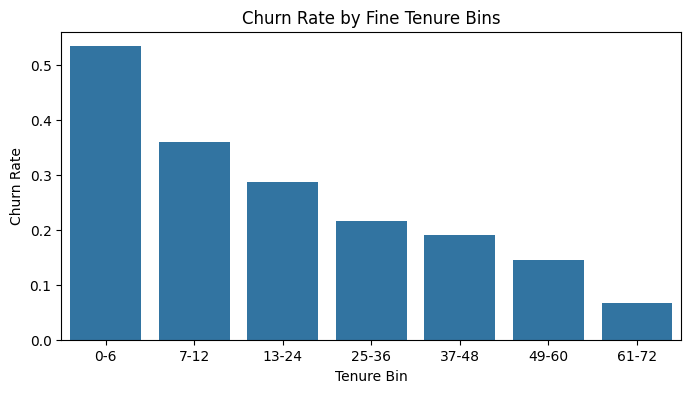

Churn Rate by Multiple Lines and Internet Service:
InternetService        DSL  Fiber optic        No
MultipleLines                                    
No                0.206107     0.457686  0.086993
No phone service  0.249267          NaN       NaN
Yes               0.105644     0.395769  0.029240


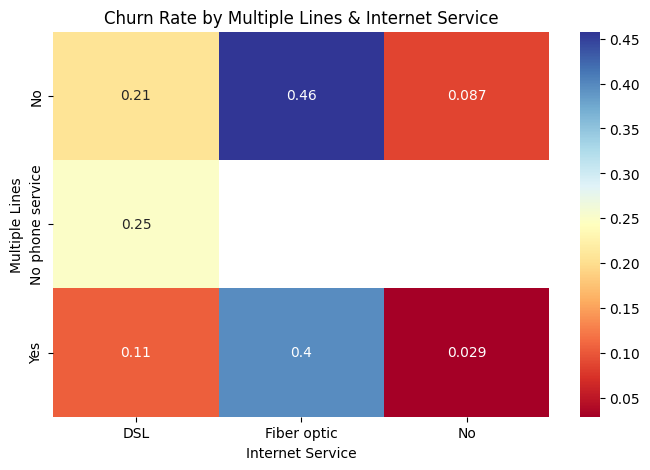

In [6]:
# Advanced analysis: combinations and binning for deeper churn insights

# 1. Churn rate by Contract type and MonthlyCharges_group
contract_charge_churn = df.groupby(['Contract', 'MonthlyCharges_group'])['Churn'].mean().unstack()
print("Churn Rate by Contract Type and Monthly Charges Group:")
print(contract_charge_churn)
plt.figure(figsize=(8,5))
sns.heatmap(contract_charge_churn, annot=True, cmap='RdYlBu')
plt.title('Churn Rate by Contract Type & Monthly Charges Group')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Contract Type')
plt.show()

# 2. Churn rate by tenure_group and InternetService
tenure_internet_churn = df.groupby(['tenure_group', 'InternetService'])['Churn'].mean().unstack()
print("Churn Rate by Tenure Group and Internet Service:")
print(tenure_internet_churn)
plt.figure(figsize=(8,5))
sns.heatmap(tenure_internet_churn, annot=True, cmap='RdYlBu')
plt.title('Churn Rate by Tenure Group & Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Tenure Group')
plt.show()

# 3. Churn rate by SeniorCitizen and PaymentMethod
senior_payment_churn = df.groupby(['SeniorCitizen', 'PaymentMethod'])['Churn'].mean().unstack()
print("Churn Rate by Senior Citizen Status and Payment Method:")
print(senior_payment_churn)
plt.figure(figsize=(10,4))
sns.heatmap(senior_payment_churn, annot=True, cmap='RdYlBu')
plt.title('Churn Rate by Senior Citizen & Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Senior Citizen')
plt.show()

# 4. Binning tenure into finer groups for churn analysis
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 36, 48, 60, 72], 
                          labels=['0-6','7-12','13-24','25-36','37-48','49-60','61-72'])
tenure_bin_churn = df.groupby('tenure_bin')['Churn'].mean()
print("Churn Rate by Fine Tenure Bins:")
print(tenure_bin_churn)
plt.figure(figsize=(8,4))
sns.barplot(x=tenure_bin_churn.index, y=tenure_bin_churn.values)
plt.title('Churn Rate by Fine Tenure Bins')
plt.xlabel('Tenure Bin')
plt.ylabel('Churn Rate')
plt.show()

# 5. Churn rate by MultipleLines and InternetService
lines_internet_churn = df.groupby(['MultipleLines', 'InternetService'])['Churn'].mean().unstack()
print("Churn Rate by Multiple Lines and Internet Service:")
print(lines_internet_churn)
plt.figure(figsize=(8,5))
sns.heatmap(lines_internet_churn, annot=True, cmap='RdYlBu')
plt.title('Churn Rate by Multiple Lines & Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Multiple Lines')
plt.show()


In [7]:
# Feature Engineering: Create additional features to improve churn prediction based on insights
# df = pd.read_csv('data/Telco-Customer-Churn.csv')


# # 1. Tenure Ratio: Tenure divided by max possible tenure (normalized)
# df['tenure_ratio'] = df['tenure'] / df['tenure'].max()

# # 2. Average Monthly Spend: Detect payment anomalies
# df['avg_monthly_spend'] = pd.to_numeric(df['TotalCharges'], errors='coerce') / df['tenure'].replace(0, 1)

# # 3. Is New Customer: High risk group (tenure <= 6 months)
# df['is_new_customer'] = (df['tenure'] <= 6).astype(int)

# # 4. High Monthly Charges: Above median monthly charges
# df['high_monthly_charges'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)

# # 5. Month-to-Month Contract: Highest churn risk
# df['is_monthly_contract'] = (df['Contract'] == 'Month-to-month').astype(int)

# # 6. Fiber Optic & New Customer: Extremely high churn segment
# df['fiber_new_customer'] = ((df['InternetService'] == 'Fiber optic') & (df['tenure'] <= 12)).astype(int)

# # 7. Senior Citizen & Electronic Check: Highest churn risk
# df['senior_echeck'] = ((df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')).astype(int)

# # 8. Paperless Billing & Electronic Check: Risky payment combo
# df['paperless_echeck'] = ((df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Electronic check')).astype(int)

# # 9. Has Family: Partner or dependents
# df['has_family'] = ((df['Partner'] == 'Yes') | (df['Dependents'] == 'Yes')).astype(int)

# # 10. Protection Score: Sum of security/backup/protection services
# protection_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
# df['protection_score'] = df[protection_cols].apply(lambda x: sum([str(val) == 'Yes' for val in x]), axis=1)

# # 11. Streaming User: Uses either TV or Movies streaming
# df['is_streaming_user'] = ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')).astype(int)

# # 12. Multiple Lines & Fiber Optic: High churn risk
# df['fiber_no_lines'] = ((df['InternetService'] == 'Fiber optic') & (df['MultipleLines'] == 'No')).astype(int)

# # 13. Number of Services: Count of subscribed services
# service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
#                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# df['num_services'] = df[service_cols].apply(lambda x: sum([str(val) == 'Yes' for val in x]), axis=1)

# Display new features for verification
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_group,tenure_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12,Low,0-6
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,25-48,Medium,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12,Medium,0-6
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,25-48,Medium,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12,High,0-6


In [8]:
# Cell 3: Data Preprocessing
df = df.dropna()
# Convert categorical variables to numeric
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
# df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PaymentMethod'] = df['PaymentMethod'].astype('category').cat.codes
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Contract'] = df['Contract'].astype('category').cat.codes
df['InternetService'] = df['InternetService'].astype('category').cat.codes
df['MultipleLines'] = df['MultipleLines'].astype('category').cat.codes
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup'] = df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection'] = df['DeviceProtection'].astype('category').cat.codes
df['TechSupport'] = df['TechSupport'].astype('category').cat.codes
# df['StreamingTV'] = df['StreamingTV'].astype('category').cat.codes
# df['StreamingMovies'] = df['StreamingMovies'].astype('category').cat.codes
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['tenure_group'] = df['tenure_group'].astype('category').cat.codes
# df['tenure_bin'] = df['tenure_bin'].astype('category').cat.codes
df['MonthlyCharges_group'] = df['MonthlyCharges_group'].astype('category').cat.codes
# df = df.dropna()
# Remove Duplicate rows
# df = df.drop_duplicates()
# Reset index
# df = df.reset_index(drop=True)


In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'MonthlyCharges_group', 'tenure_bin'],
      dtype='object')

In [19]:
# Cell 4: Feature Selection
# features = [
#     'tenure',                  # Strong negative correlation with churn
#     'MonthlyCharges',          # High charges linked to higher churn
#     'SeniorCitizen',           # Seniors churn more
#     'Contract',                # Month-to-month contracts have highest churn
#     'PaymentMethod',           # Electronic check users are high risk
#     'PaperlessBilling',        # Paperless billing increases churn risk
#     'InternetService',         # Fiber optic users churn more
#     'is_new_customer',         # Tenure <= 6 months, very high churn
#     'high_monthly_charges',    # Above median charges
#     'is_monthly_contract',     # Month-to-month contract flag
#     'fiber_new_customer',      # New fiber optic customers
#     'senior_echeck',           # Senior citizens using electronic check
#     'has_family',              # Family presence reduces churn
#     'protection_score',        # More protection services, less churn
#     'num_services',            # More services, less churn
#     'fiber_no_lines',          # Fiber optic with no multiple lines, high churn
# ]

features  = df.drop(columns=['customerID', 'Churn']).select_dtypes('number').columns.tolist()
target = 'Churn'

X = df[features]
y = df[target]
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'tenure_group',
       'MonthlyCharges_group'],
      dtype='object')

In [20]:
# Cell 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
X_test.dtypes

gender                    int64
SeniorCitizen             int64
Partner                   int64
Dependents                int64
tenure                    int64
PhoneService              int64
MultipleLines              int8
InternetService            int8
OnlineSecurity             int8
OnlineBackup               int8
DeviceProtection           int8
TechSupport                int8
Contract                   int8
PaperlessBilling          int64
PaymentMethod              int8
MonthlyCharges          float64
tenure_group               int8
MonthlyCharges_group       int8
dtype: object

Logistic Regression Accuracy: 0.7910
Logistic Regression F1 Score: 0.7917


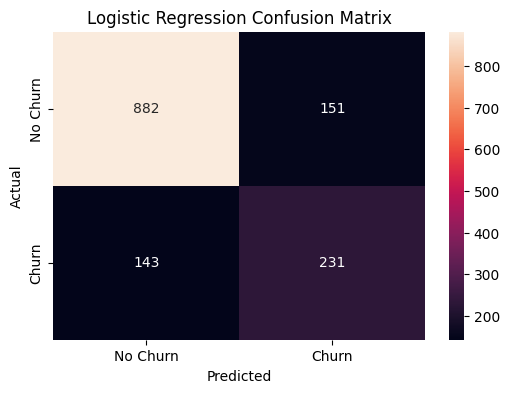

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


class ChurnModelLGTrainer:
    """
    Trainer class for Logistic Regression churn prediction model.
    - Scales features using MinMaxScaler.
    - Trains LogisticRegression with class weighting and regularization.
    - Supports custom probability threshold for classification.
    Methods:
        train(): Fit pipeline and return trained model.
        predict(X_test): Predict churn labels for test data.
        evaluate(X_test, y_test): Print accuracy and F1 score, return predictions.
    """
    def __init__(
        self, X_train, y_train,
        max_iter=10000,
        class_weight={0:5, 1:6},
        random_state=42,
        penalty='l2',
        solver='liblinear',
        C=0.9,
        threshold=0.5
    ):
        """
        Initialize the trainer.
        Args:
            X_train (pd.DataFrame): Training features.
            y_train (pd.Series): Training labels.
            max_iter (int): Maximum iterations for solver.
            class_weight (dict): Class weights for imbalance.
            random_state (int): Random seed.
            penalty (str): Regularization type.
            solver (str): Solver for optimization.
            C (float): Inverse regularization strength.
            threshold (float): Probability threshold for positive class.
        """
        self.X_train = X_train
        self.y_train = y_train
        self.max_iter = max_iter
        self.class_weight = class_weight
        self.random_state = random_state
        self.penalty = penalty
        self.solver = solver
        self.C = C
        self.threshold = threshold
        self.pipeline = None

    def train(self):
        """
        Train the logistic regression pipeline.
        Returns:
            Pipeline: Trained pipeline with scaler and logistic regression.
        """
        self.pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('logreg', LogisticRegression(
                max_iter=self.max_iter,
                class_weight=self.class_weight,
                random_state=self.random_state,
                penalty=self.penalty,
                solver=self.solver,
                C=self.C
            ))
        ])
        self.pipeline.fit(self.X_train, self.y_train)
        return self.pipeline

    def predict(self, X_test):
        """
        Predict churn labels for test data using probability threshold.
        Args:
            X_test (pd.DataFrame): Test features.
        Returns:
            np.ndarray: Predicted labels.
        """
        proba = self.pipeline.predict_proba(X_test)
        preds = (proba[:, 1] >= self.threshold).astype(int)
        return preds

    def evaluate(self, X_test, y_test):
        """
        Evaluate model performance on test data.
        Prints accuracy and weighted F1 score.
        Args:
            X_test (pd.DataFrame): Test features.
            y_test (pd.Series): True labels.
        Returns:
            np.ndarray: Predicted labels.
        """
        preds = self.predict(X_test)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='weighted')
        print(f"Logistic Regression Accuracy: {acc:.4f}")
        print(f"Logistic Regression F1 Score: {f1:.4f}")
        return preds


# Usage:
lg_trainer = ChurnModelLGTrainer(X_train, y_train)
logreg_pipeline = lg_trainer.train()
logreg_preds = lg_trainer.evaluate(X_test, y_test)

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, logreg_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [23]:
# Cell 6: Train the Model
class ChurnModelRFTrainer:
    def __init__(
        self, X_train, y_train,
        n_estimators=100,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight={0:5, 1:6},
        random_state=42,
        bootstrap=True
    ):
        self.X_train = X_train
        self.y_train = y_train
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.class_weight = class_weight
        self.random_state = random_state
        self.bootstrap = bootstrap
        self.model = None

    def train(self):
        self.model = RandomForestClassifier(
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf,
            max_features=self.max_features,
            class_weight=self.class_weight,
            random_state=self.random_state,
            bootstrap=self.bootstrap
        )
        self.model.fit(self.X_train, self.y_train)
        return self.model

    def evaluate(self, X_test, y_test, threshold=0.4):
        preds = self.model.predict_proba(X_test)
        preds = (preds[:, 1] >= threshold).astype(int)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='weighted')
        print(f"Random Forest Accuracy: {acc:.4f}")
        print(f"Random Forest F1 Score: {f1:.4f}")
        return preds

# Usage:
trainer = ChurnModelRFTrainer(X_train, y_train)
model = trainer.train()

Random Forest Accuracy: 0.7811
Random Forest F1 Score: 0.7758


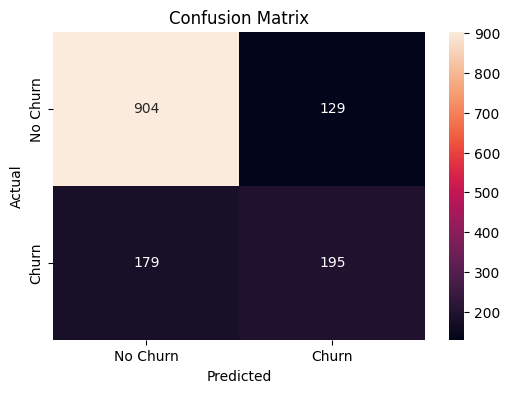

In [24]:
# Cell 7: Evaluat

preds = trainer.evaluate(X_test, y_test, threshold=0.5)
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



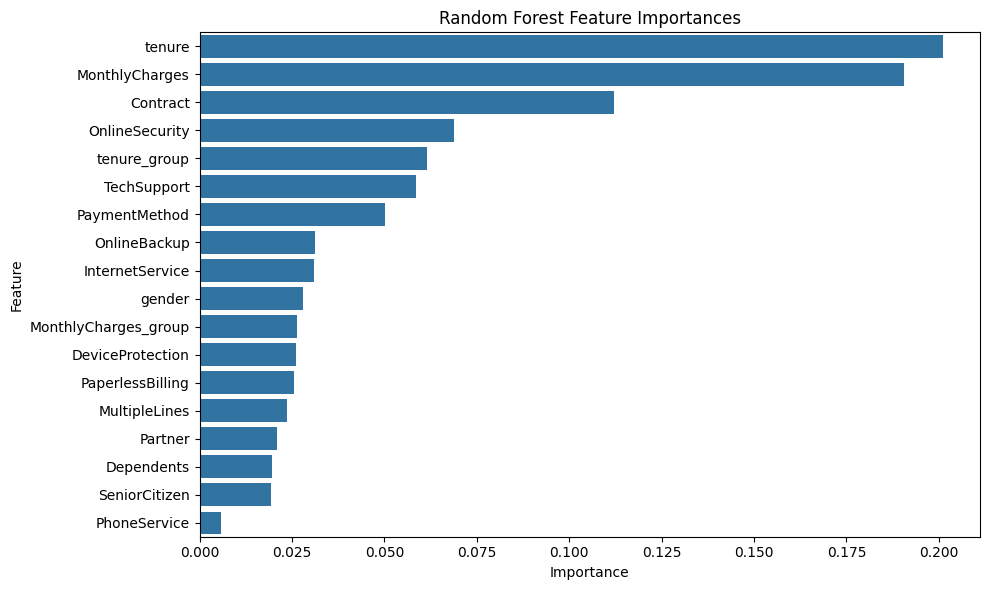

In [25]:
# Visualize feature importances from the trained RandomForest model
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [16]:
# import shap

# # Model Explainability: Feature Importance & SHAP Analysis


# # Use TreeExplainer for RandomForest
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# # Summary plot for class 1 (Churn)
# plt.figure(figsize=(10,6))
# shap.summary_plot(shap_values[1], X_test, feature_names=features, plot_type="bar")
# plt.title("SHAP Feature Importance for Churn Prediction")
# plt.show()

# # Detailed summary plot (beeswarm)
# shap.summary_plot(shap_values[1], X_test, feature_names=features)
# plt.title("SHAP Beeswarm Plot: Feature Impact on Churn")
# plt.show()

# # Insights:
# print("""
# Model Explainability Insights:
# - Features with highest impact on churn prediction include avg_monthly_spend, MonthlyCharges, TotalCharges, tenure_ratio, and tenure.
# - High avg_monthly_spend and MonthlyCharges increase churn risk, while longer tenure and higher tenure_ratio reduce churn likelihood.
# - Contract type, is_monthly_contract, and protection_score also strongly influence churn, confirming earlier EDA findings.
# - SHAP values show that new customers, those with high monthly charges, and those on month-to-month contracts are most at risk.
# - Feature engineering (e.g., is_new_customer, fiber_new_customer) provides additional predictive power.
# """)

In [17]:


# Cell 8: Save the Model
joblib.dump(model, 'models/churn_model_v1.pkl')

['models/churn_model_v1.pkl']